# Exercise 2

In [1]:
using LinearAlgebra, Statistics, Compat, Plots

In [2]:
function mean_random_walk(T, N, γ= 1.0, σ= 1.0, Θ  = [0.1, 0.5, 0.98])
    y  = zeros(T,3)
    Y  = zeros(N,3)
    Y_mean = zeros(N,3)
    Y_var = zeros(N,3)
    y_mean = zeros(T,3)
    for i in 2:T
        ω = randn()
        y[i,:] = γ .+  Θ .* y[i-1,:] .+ σ .* ω
        y_mean[i,:] = mean(y[1:i,:],dims=1) 
    end
    return y_mean
end


mean_random_walk (generic function with 4 methods)

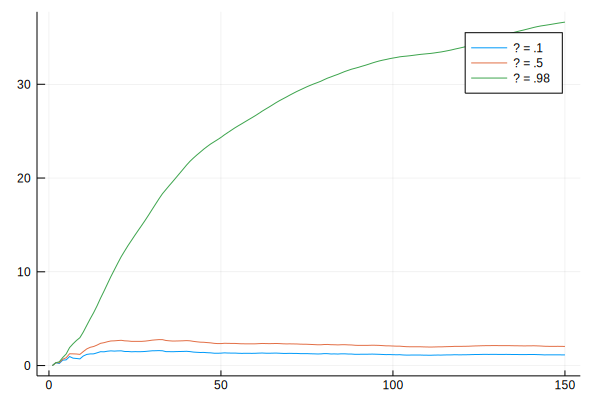

In [3]:
y_mean = mean_random_walk(150, 200)
plot(y_mean,label=["θ = .1" "θ = .5" "θ = .98"], legend=:topright)

In [4]:
N = 200
T = 150
Y_mean = zeros(N,3)

for j in 1:N  
    y  = zeros(T,3)
    y_mean = mean_random_walk(150, 200)
    Y_mean[j,:] = y_mean[T,:]
end

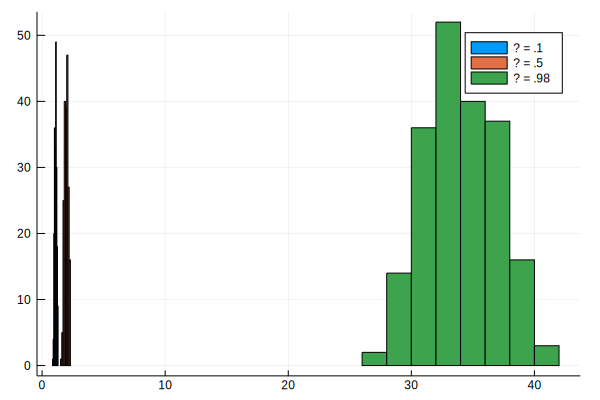

In [5]:
histogram(Y_mean,label=["θ = .1" "θ = .5" "θ = .98"])

In [6]:
total_Y_mean = zeros(3) 
Y_var = zeros(3)
for i in 1:3
    total_Y_mean[i] = mean(Y_mean[:,i])
    Y_var[i] = mean(Y_mean[:,i].^2) - Y_mean[i]^2
end

In [7]:
@show total_Y_mean
@show Y_var ;

total_Y_mean = [1.10293, 1.97262, 34.104]
Y_var = [0.033209, 2.74676, 1170.11]


# Exercise 3

In [8]:
function OLS_β(N, M, a= 0.1, b=0.2, c=0.5, d=1.0, σ = 0.1)
    β̂  = zeros(M,4);
    β = [d, a, b, c]
    for i in 1:M
        x₁ = randn(N)
        x₂ = randn(N)
        ω  = randn(N)
        X  = [ones(N) x₁ x₁.^2 x₂]
        y = X*β .+ σ*ω
        β̂[i,:] = (X'X)\X'y
    end
    return β̂
end

N = 50
M = 20

β̂ = OLS_β(M, N);

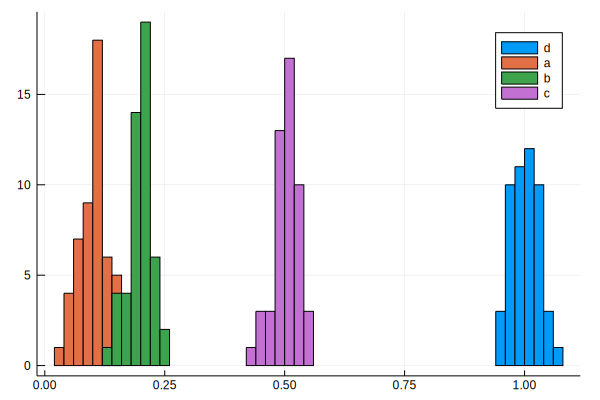

In [9]:
histogram(β̂,label=["d" "a" "b" "c"])